In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, or_, and_

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [23]:
# Calculate the date 1 year ago from the last data point in the database

#calculate the last date recorded in the table
last_date_query = session.query(func.max(Measurement.date).label("max_date"))

last_date = last_date_query.one()
max_date = last_date.max_date

# convert the str type max_date into datetime
max_date_dt = dt.datetime.strptime(max_date, '%Y-%m-%d')
print(max_date_dt)
#calculate the min date which is maxdate - 365 
min_date_dt = max_date_dt - dt.timedelta(days=365)
print(min_date_dt)

date_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(and_(Measurement.date<='2017-08-23', Measurement.date>='2016-08-23')).order_by(Measurement.date.asc()).statement

type(date_prcp)


#for x in date_prcp:
  #  print(x)

2017-08-23 00:00:00
2016-08-23 00:00:00


sqlalchemy.sql.selectable.Select

In [98]:
# Save the query results as a Pandas DataFrame and set the index to the date column
#date_prcp_df = pd.DataFrame(date_prcp, columns=['Date', 'Precipitation']).set_index('Date')
#date_prcp_df = pd.DataFrame(date_prcp, columns=['date', 'prcp'])
#date_prcp_df['Precipitation'] = date_prcp_df['Precipitation'].replace(np.NaN, 0)
pd.set_option('display.max_rows', 3000)

date_prcp_df = pd.read_sql_query(date_prcp, session.bind)
date_prcp_df[['prcp']]=date_prcp_df[['prcp']].fillna(value=0)

date_prcp_df.head()
#date_prcp_df.dtypes


#date_prcp_df.loc[date_prcp_df['prcp'] >2.0 ]


,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.00
4,2016-08-23,0.02


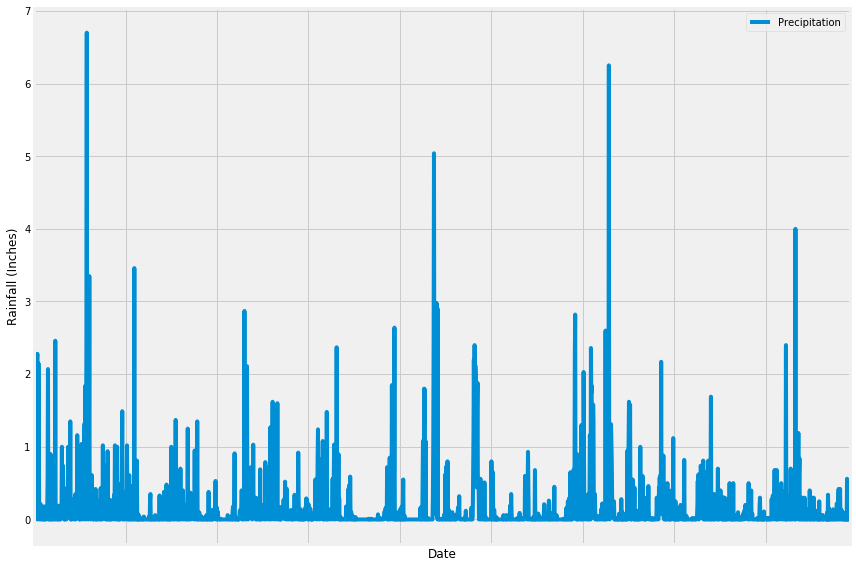

<Figure size 432x288 with 0 Axes>

In [108]:

date_prcp_df.plot(figsize=(12,8))


#ax = date_prcp_df.plot.bar(y='Precipitation')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel("Date")
plt.ylabel("Rainfall (Inches)")
plt.legend(["Precipitation"])
plt.tight_layout()
plt.show()
plt.savefig('Images/Precipitation.png')

In [105]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df.describe()


,prcp
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [106]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(Station.name).count()
print(f'There are {stations_count} stations in Hawaii.'.format())

There are 9 stations in Hawaii.


In [116]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                               group_by(Measurement.station).\
                               order_by(func.count(Measurement.station).desc()).all()


active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [119]:
station_id = active_stations[0][0]
station_name = session.query(Station.name).filter(Station.station==active_stations[0][0]).all()
print(f'The highest number of observations were recorded from the station {active_stations[0][0]}, {station_name[0][0]}')

The highest number of observations were recorded from the station USC00519281, WAIHEE 837.5, HI US


In [112]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temperatures_active_station = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').order_by(func.min(Measurement.tobs)).all()
temperatures_active_station

[(54.0, 85.0, 71.66378066378067)]

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [121]:
USC00519281_1year_query = session.query(Measurement.tobs, Measurement.station).\
filter(Measurement.date >='2016-08-23', Measurement.date <='2017-08-23').\
filter(Measurement.station==station_id).\
order_by(Measurement.date).statement 

USC00519281_df = pd.read_sql(USC00519281_1year_query, engine).dropna()
USC00519281_df.head(5)



,tobs,station
0,77.0,USC00519281
1,77.0,USC00519281
2,80.0,USC00519281
3,80.0,USC00519281
4,75.0,USC00519281


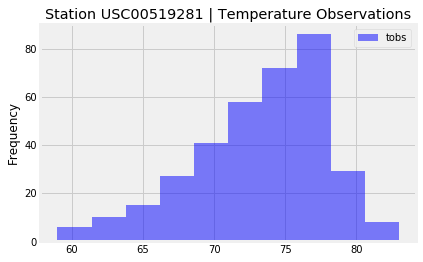

In [126]:
#plot histogram
USC00519281_df.hist(column='tobs', color = 'b', alpha = 0.50)
plt.title('Station USC00519281 | Temperature Observations')
plt.legend(["tobs"])
plt.ylabel('Frequency')
plt.savefig('Images/station_USC00519281.png')
plt.show()

In [127]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [128]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

#The tmin, tavg and tmax for the date range | Aug 05 thru Aug 12

print(calc_temps('2016-08-05', '2016-08-12'))

[(71.0, 78.66037735849056, 83.0)]


([<matplotlib.axis.YTick at 0x16d7a3d37b8>,
 <a list of 6 Text yticklabel objects>)

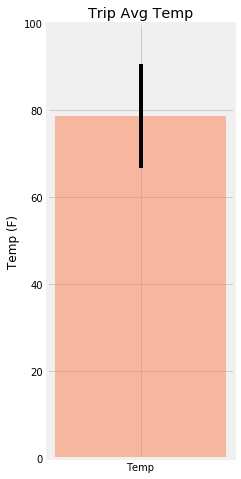

In [136]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_temps = calc_temps('2016-08-05', '2016-08-12')

yaxis = trip_temps[0][1]
temp_min = trip_temps[0][0]
temp_max = trip_temps[0][2]
y_error = [temp_max - temp_min]

plt.figure(figsize=(3,8))
plt.bar('Temp', yaxis, alpha=.5, align = "center", yerr = y_error, width=.01, color='coral')

plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.yticks(np.arange(0, 110, 20))

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
